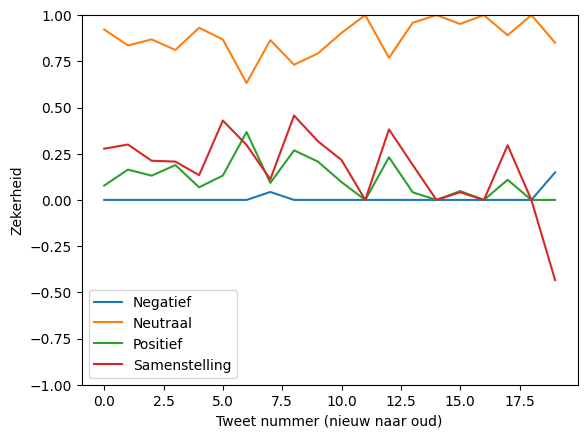

In [5]:
import tweepy
import nltk
import matplotlib.pyplot as pyplot
import deep_translator


def get_tweets_from_userid(token, userid):
    client = tweepy.Client(bearer_token=token)

    paginator = tweepy.Paginator(
        client.get_users_tweets, id=userid, max_results=20)

    tweets = []
    for tweet in paginator.flatten(limit=20):
        tweets.append(tweet.text)

    return tweets


def translate_tweets(tweets):
    translated_tweets = deep_translator.GoogleTranslator(
        source="nl", target="en").translate_batch(tweets)

    return translated_tweets


def calculate_sentiment(tweets):
    neg = []
    neu = []
    pos = []
    compound = []

    for tweet in tweets:
        lines = nltk.tokenize.sent_tokenize(tweet)

        neg_lines = []
        neu_lines = []
        pos_lines = []
        compound_lines = []

        for line in lines:
            ss = nltk.sentiment.vader.SentimentIntensityAnalyzer().polarity_scores(line)
            neg_lines.append(ss["neg"])
            neu_lines.append(ss["neu"])
            pos_lines.append(ss["pos"])
            compound_lines.append(ss["compound"])

        neg.append(sum(neg_lines) / len(neg_lines))
        neu.append(sum(neu_lines) / len(neu_lines))
        pos.append(sum(pos_lines) / len(pos_lines))
        compound.append(sum(compound_lines) / len(compound_lines))

    return neg, neu, pos, compound


def plot_graph(neg, neu, pos, compound):
    pyplot.ylim((-1.0, 1.0))
    pyplot.xlabel("Tweet nummer (nieuw naar oud)")
    pyplot.ylabel("Zekerheid")

    pyplot.plot(neg, label="Negatief")
    pyplot.plot(neu, label="Neutraal")
    pyplot.plot(pos, label="Positief")
    pyplot.plot(compound, label="Samenstelling")

    pyplot.legend()
    pyplot.show()


# TODO: Add twitter bearer token!
tweets = get_tweets_from_userid(
    "", "86038204")
translated_tweets = translate_tweets(tweets)
neg, neu, pos, compound = calculate_sentiment(translated_tweets)
plot_graph(neg, neu, pos, compound)
